In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")
import numpy as np

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
from pandas import HDFStore,DataFrame
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

**reading data**

In [0]:
#reading
from pandas import read_hdf 
df_final_train = read_hdf('/content/drive/My Drive/Facebook/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r') 
df_final_test = read_hdf('/content/drive/My Drive/Facebook/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r') 

**Adding feature svd_dot**

In [0]:
#for train datasets
s1,s2,s3,s4,s5,s6=df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']

In [0]:
svd_dot_u=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    svd_dot_u.append(np.dot(a,b))
df_final_train['svd_dot_u']=svd_dot_u

In [0]:
svd_dot_v=[]
for i in range(len(np.array(s7))):
    a=[]
    b=[]
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))

    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot_v.append(np.dot(a,b))
df_final_train['svd_dot_v']=svd_dot_v

In [0]:
#for test dataset
s1,s2,s3,s4,s5,s6=df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']

In [0]:

svd_dot_u=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    
    svd_dot_u.append(np.dot(a,b))
df_final_test['svd_dot_u']=svd_dot_u

In [0]:
svd_dot_v=[]
for i in range(len(np.array(s7))):
    a=[]
    b=[] 
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))

    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot_v.append(np.dot(a,b))
df_final_test['svd_dot_v']=svd_dot_v

**Preferential Attachement**

In [11]:
if os.path.isfile('/content/drive/My Drive/Facebook/data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('/content/drive/My Drive/Facebook/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph)) 

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [12]:
if os.path.isfile('/content/drive/My Drive/Facebook/data/after_eda/test_pos_after_eda.csv'):
    test_graph=nx.read_edgelist('/content/drive/My Drive/Facebook/data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(test_graph))

Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490


In [0]:
def compute_features_stage1(data_df,df_graph):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_d=[]
    for i,row in data_df.iterrows():
      try:
        d1=set(df_graph.predecessors(row['destination_node'])) 
      except:
        d1 = set()
      num_followers_d.append(len(d1))
    return num_followers_d

In [0]:
df_final_train['num_followers_d'] = compute_features_stage1(df_final_train,train_graph)
df_final_test['num_followers_d'] =  compute_features_stage1(df_final_test,test_graph) 

- followers

In [0]:
#for train dataset
nfs=np.array(df_final_train['num_followers_s'])
nfd=np.array(df_final_train['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followers']= preferential_followers

In [0]:
#for test dataset 
nfs=np.array(df_final_test['num_followers_s'])
nfd=np.array(df_final_test['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followers']= preferential_followers

- followees

In [0]:
#for train dataset
nfs=np.array(df_final_train['num_followees_s'])
nfd=np.array(df_final_train['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followees']= preferential_followees

In [0]:
#for test dataset
nfs=np.array(df_final_test['num_followees_s'])
nfd=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followees']= preferential_followees

In [0]:
hdf = HDFStore('storage_sample_stage4.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link 

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
from sklearn.preprocessing import normalize
X_train = normalize(df_final_train,axis=0, copy=False)
X_test=   normalize(df_final_test,axis=0, copy=False) 

In [0]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
base_learners = [5,10,15,20,25,50,75,100,120,150] # Number of trees in random forest 
depth = [10,20,30,40,50,60,70,80,90,100] # Maximum number of levels in tree
clf=  RandomForestClassifier() 
param_grid = {'n_estimators': base_learners,'max_depth': depth} 
grid = GridSearchCV(clf, param_grid, cv=3 , scoring = 'f1', n_jobs=-1,return_train_score=True)
grid.fit(X_train,y_train) 

In [0]:
print("Best HyperParameter: ",grid.best_params_)
print(grid.best_score_) 
cv_auc = grid.cv_results_['mean_test_score'].reshape(len(base_learners),len(depth))
plt.figure(figsize=(8, 8)) 
sns.heatmap(cv_auc, annot=True, cmap=plt.cm.hot, fmt=".3f", xticklabels=base_learners, yticklabels=depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth') 

In [26]:
RF= RandomForestClassifier(n_estimators=100,max_depth=70) 
RF.fit(X_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_train_pred = RF.predict(X_train) 
y_test_pred = RF.predict(X_test) 

In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


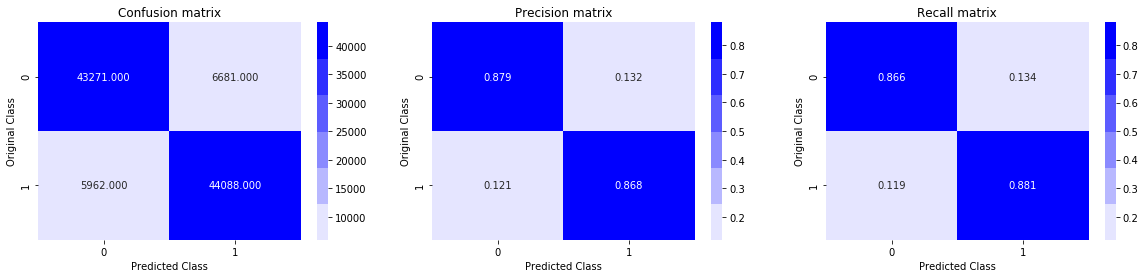

Test confusion_matrix


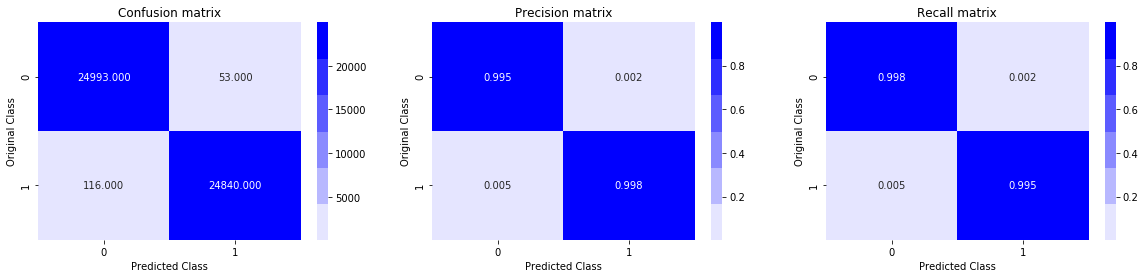

In [29]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

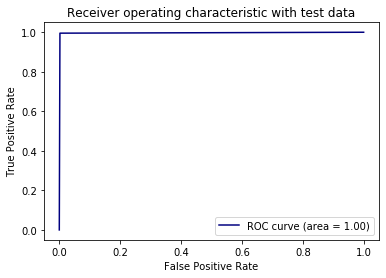

In [30]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

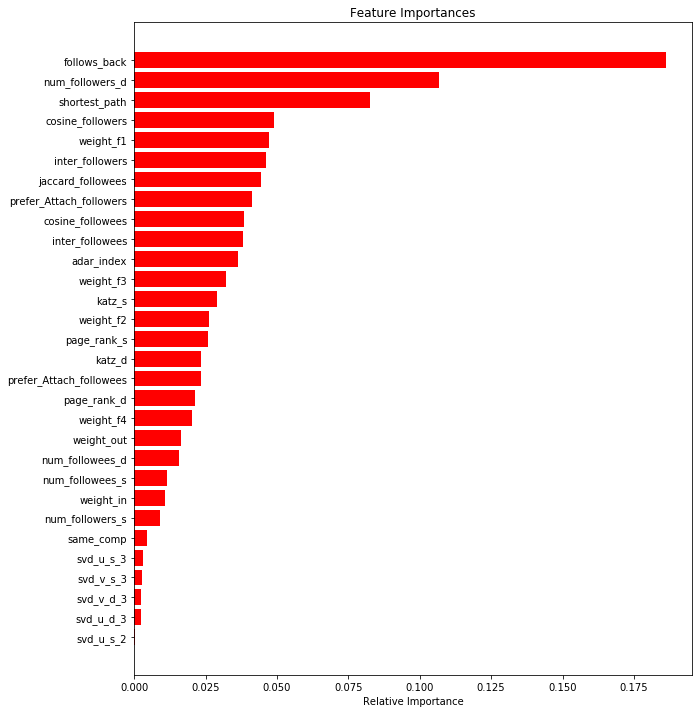

In [32]:
features = df_final_train.columns 
importances = RF.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Applying XGboost**

In [0]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
estimators = [100, 200, 300, 400, 500,600] 
tree_depth = [2, 3, 5, 8, 10, 20]
clf_xgb = xgb.XGBClassifier() 
param_grid = {'n_estimators': estimators,'max_depth': tree_depth} 
grid = GridSearchCV(clf_xgb, param_grid, cv=3 , scoring = 'f1', n_jobs=-1,return_train_score=True)
grid.fit(X_train,y_train) 

In [0]:
print('mean test scores',grid.cv_results_['mean_test_score'])
print('mean train scores',grid.cv_results_['mean_train_score'])

In [0]:
print("Best HyperParameter: ",grid.best_params_)
print(grid.best_score_) 
cv_auc = grid.cv_results_['mean_test_score'].reshape(len(estimators),len(tree_depth))
plt.figure(figsize=(8, 8)) 
sns.heatmap(cv_auc, annot=True, cmap=plt.cm.hot, fmt=".3f", xticklabels=estimators, yticklabels=tree_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth') 

In [33]:
import xgboost as xgb
GBDT= xgb.XGBClassifier(n_estimators=600,max_depth=5)  
GBDT.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_train_pred = GBDT.predict(X_train) 
y_test_pred = GBDT.predict(X_test) 

Train confusion_matrix


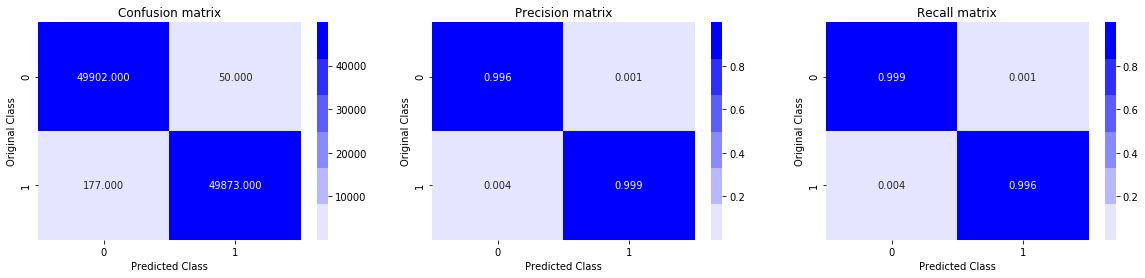

Test confusion_matrix


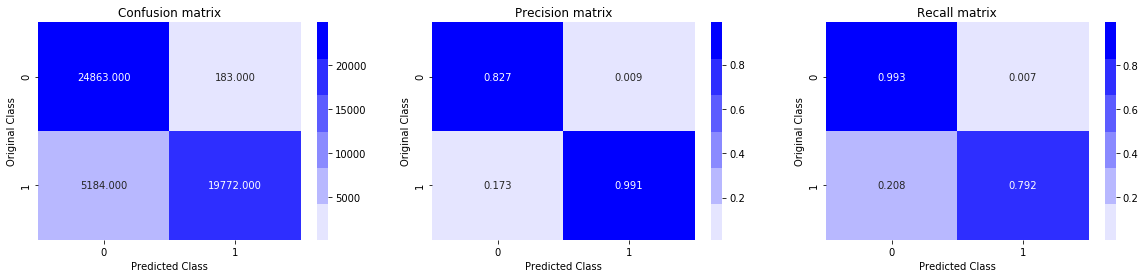

In [35]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

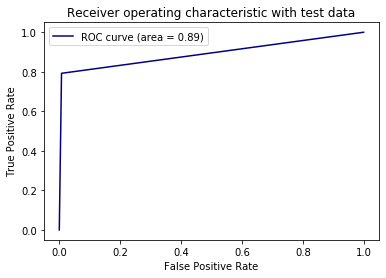

In [36]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

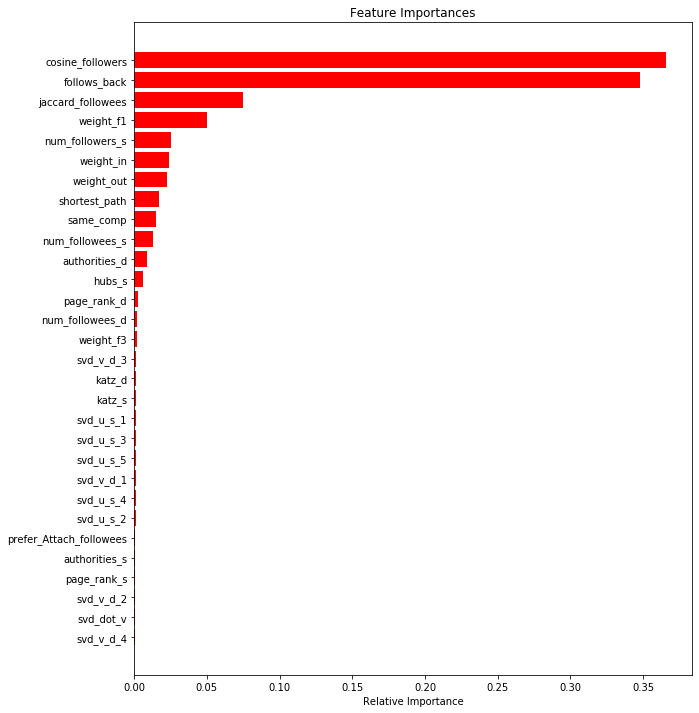

In [37]:
features = df_final_train.columns 
importances = GBDT.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

**Performance**

In [38]:
from prettytable import PrettyTable
from termcolor import colored
print(colored('Performance Table','green'))
x = PrettyTable()
x.field_names =["Models","Test"]
x.add_row(["Random Forest ",0.9730152])
x.add_row(["XGboost",0.9828768])
print(x)

Performance Table
+----------------+-----------+
|     Models     |    Test   |
+----------------+-----------+
| Random Forest  | 0.9730152 |
|    XGboost     | 0.9828768 |
+----------------+-----------+
